# Welcome to this notebook on Gradient Descent

## What is gradient descent?
Gradient descent is an iterative optimisation algorithm that can be used to find a minimum or maximum of a function $f(\boldsymbol{\theta})$. At each iteration, it takes a step in the direction of the gradient $\nabla f(\boldsymbol{\theta})$.

## How does gradient descent work?
The gradient descent algorithm is as follows:

___
**Start**: Choose starting value $\theta_0$, learning rate $\epsilon$ and take $i = 0$.
___
**Algorithm**:
1) Calculate $\nabla f(\theta_i)$.
2) Update $\theta_{i+1} = \theta_{i} - \epsilon \nabla f(\theta_i)$.
3) (a) stop if $i$ large or $|\theta_{i+1}-\theta_{i}|$ small enough.  
   (b) else: update $i$ to $i+1$ and go back to (1).
___

In the implementation below, you can perform an one-dimensional gradient descent and/or ascent, in which case $\nabla f(\theta_i) = f'(\theta_i)$.

You can also experiment with what happens if stochastic noise is added to the gradient. This is interesting, as in (most) practical situations the true gradient is unkown, and you may only be able to use noisy measurements of the gradient.

You can also experiment with the difference between a fixed learning rate $\epsilon$ and a decreasing learning rate according to $\epsilon = \frac{1}{i+1}$.


## Try gradient descent yourself and see what happens

In [28]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

In [29]:
# Fill in the objective function you would like to use:
def objective_f(theta):
    return np.power(theta, 2)

In [30]:
# Fill in the gradient of the objective function:
def gradient_f(theta, STOCHASTIC, MU, SIGMA):
    
    function = 2*theta
    
    if STOCHASTIC:
        function = function + add_noise(MU, SIGMA)
        
    return function

In [31]:
# Adds normally distributed noise to the gradient. 
def add_noise(MU, SIGMA):
    return np.random.normal(MU, SIGMA, size=1)

In [40]:
# Fill in the number of iterations you would like to run gradient descent.
NR_ITERATIONS = 100

In [41]:
# Do you want to use decreasing or fixed epsilon?
EPSILON_TYPE = 'fixed' #'fixed' or 'decreasing'
# In case of fixed epsilon, fill in the value for epsilon.
EPSILON_VALUE = 0.01

In [42]:
# Fill in the starting value for the optimisation:
THETA_0 = 10

In [43]:
# Do you want to do maximization or minimization?
OPTIMIZATION_TYPE = 'minimization' #or 'maximization' b##

In [44]:
# Do you want to add stochasticity?
STOCHASTIC = False #False or True
MU = 0 # mu parameter of the normal distribution for the noise.
SIGMA = 1 # sigma parameter of the normal distribution for the noise.

In [45]:
# The gradient descent algorithm
def gradient_descent(THETA_0, EPSILON_TYPE, EPSILON_VALUE, NR_ITERATIONS, STOCHATIC, MU, SIGMA):
    thetas = np.zeros(NR_ITERATIONS+1)
    thetas[0] = THETA_0
    
    for i in range(NR_ITERATIONS):
        if EPSILON_TYPE == 'fixed':
            if OPTIMIZATION_TYPE == 'minimization':
                thetas[i+1] = thetas[i] - EPSILON_VALUE * gradient_f(thetas[i], STOCHASTIC, MU, SIGMA)
            if OPTIMIZATION_TYPE == 'maximization':
                thetas[i+1] = thetas[i] + EPSILON_VALUE * gradient_f(thetas[i], STOCHASTIC, MU, SIGMA)
        if EPSILON_TYPE == 'decreasing':
            if OPTIMIZATION_TYPE == 'minimization':
                thetas[i+1] = thetas[i] - 1/(i+1) * gradient_f(thetas[i], MU, STOCHASTIC, SIGMA)
            if OPTIMIZATION_TYPE == 'maximization':
                thetas[i+1] = thetas[i] + 1/(i+1) * gradient_f(thetas[i], MU, STOCHASTIC, SIGMA)
        
    return thetas    

In [46]:
# Plot the iterates and objective values during the optimisation
def plot_iterate_and_objective(thetas):
    #Calculate the objective value at each iterate
    objective_values = objective_f(thetas)
    
    fig, axs = plt.subplots(1,2, figsize=(10,5))

    # Plot the iterate
    axs[0].plot(thetas, color="darkblue")
    axs[0].set_xlabel("Iteration")
    axs[0].set_ylabel(r"$\theta_n$")
    axs[0].set_title(r"$\theta_n$")
        
    # Plot the objective values
    axs[1].plot(objective_values, color="darkblue")
    axs[1].set_xlabel("Iteration")
    axs[1].set_ylabel(r"f($\theta_n$)")
    axs[1].set_title(r"f($\theta_n$)")

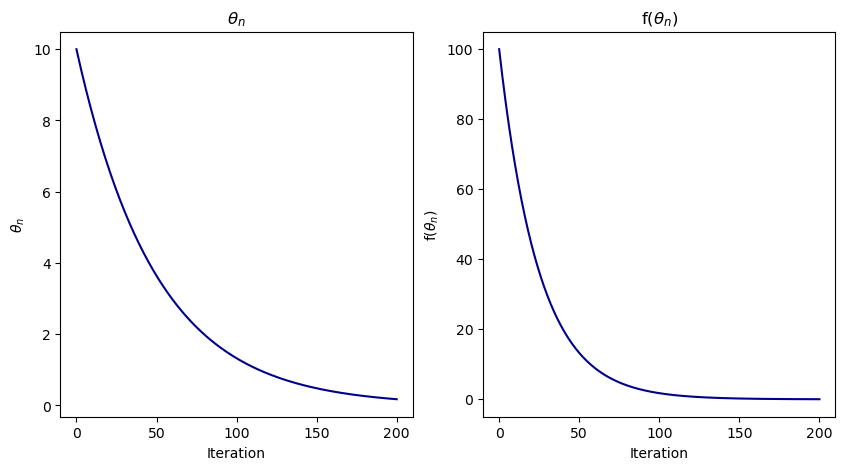

In [47]:
# Run gradient descent and plot the optimisation.
thetas = gradient_descent(THETA_0, EPSILON_TYPE, EPSILON_VALUE, NR_ITERATIONS, STOCHASTIC, MU, SIGMA)
plot_iterate_and_objective(thetas)